# タスク別前処理（マーケティング) MCMDを利用

In [1]:
# コード5.1 MCMDをインポート
import os
import nysol.mcmd as nm

os.makedirs('out_m',exist_ok=True)


# 返品処理

In [2]:
# コード5.2 返品処理

display(nm.p("in/cancel.csv",head=100))
# 行のインデックスを付与
henkin=nm.mnumber(s="モニタ,日付",a="index",i="in/cancel.csv")
# 返金行の選択
henkin<<=nm.msel(c='${金額}<0')
# 返金対象以外(金額>=0)をsalesオブジェクトに保存
sales=henkin.redirect("u")

# 返金対象の金額は負の値なので結合するためにマイナス1をかけて正に変換
henkin<<=nm.mcal(c='${金額}*-1',a="返金額")
henkin.run(msg="on")

# 削除レコードの選択
delList=nm.mjoin(k="モニタ,細分類名,金額",K="モニタ,細分類名,返金額",f="日付:返金日",m=henkin,i=sales)
# 返金日からの日数を計算
delList<<=nm.mcal(c='$d{返金日}-$d{日付}',a="日数")
# 日数が正の中から最小値を選択すれば直近の購入になる
delList<<=nm.msel(c='${日数}>=0')
delList<<=nm.mbest(k="モニタ,細分類名",s="日数%n",size="1")
delList.run(msg="on")

# 削除レコードを取り除く
f=nm.mcommon(r=True,k="index",m=delList,i=sales)
f<<=nm.msortf(f="index%n")
f<<=nm.mcut(r=True,f="index",o="out_m/cleanData.csv")
f.run(msg="on")
display(nm.p('out_m/cleanData.csv',head=1000))



,モニタ,日付,金額,細分類名
0,A,20140401,300,牛乳
1,A,20140401,200,ヨーグルト
2,A,20140401,-300,牛乳
3,A,20140403,400,半生菓子
4,B,20140408,900,ワイン
5,B,20140411,900,ワイン
6,B,20140411,900,ワイン
7,B,20140415,800,牛肉
8,B,20140417,-900,ワイン
9,B,20140418,900,ワイン


#END# kgnumber a=index i=in/cancel.csv s=モニタ,日付; IN=13 OUT=13; 2021/05/08 10:34:10; 2021/05/08 10:34:10
#END# kgsel c=${金額}<0; IN=13 OUT=2; 2021/05/08 10:34:10; 2021/05/08 10:34:10
#END# kgcal a=返金額 c=${金額}*-1; IN=2 OUT=2; 2021/05/08 10:34:10; 2021/05/08 10:34:10
#END# kgload; IN=2 OUT=1; 2021/05/08 10:34:10; 2021/05/08 10:34:10
#END# kgnumber a=index i=in/cancel.csv s=モニタ,日付; IN=13 OUT=13; 2021/05/08 10:34:10; 2021/05/08 10:34:10
#END# kgsel c=${金額}<0; IN=13 OUT=2; 2021/05/08 10:34:10; 2021/05/08 10:34:10
#END# kgcal a=返金額 c=${金額}*-1; IN=2 OUT=2; 2021/05/08 10:34:10; 2021/05/08 10:34:10
#END# kgfifo; ; 2021/05/08 10:34:10; 2021/05/08 10:34:10
#END# kgfifo; ; 2021/05/08 10:34:10; 2021/05/08 10:34:10
#END# kgjoin K=モニタ,細分類名,返金額 f=日付:返金日 k=モニタ,細分類名,金額; IN=11 OUT=5; 2021/05/08 10:34:10; 2021/05/08 10:34:10
#END# kgcal a=日数 c=$d{返金日}-$d{日付}; IN=5 OUT=5; 2021/05/08 10:34:10; 2021/05/08 10:34:10
#END# kgsel c=${日数}>=0; IN=5 OUT=4; 2021/05/08 10:34:10; 2021/05/08 10:34:10
#END# kgbest k=モニタ,細

,モニタ,日付,金額,細分類名
0,A,20140401,200,ヨーグルト
1,A,20140403,400,半生菓子
2,B,20140408,900,ワイン
3,B,20140411,900,ワイン
4,B,20140415,800,牛肉
5,B,20140418,900,ワイン
6,C,20140508,200,ヨーグルト
7,C,20140525,900,ワイン
8,C,20140528,1000,牛肉


# 名称のクリーニング

In [3]:
# コード5.3 名称のクリーニングをMCMDで実行

display(nm.p("in/itemMaster.csv",head=100))
f=nm.mcut(f="名称",i="in/itemMaster.csv")
# msedによる置換：c=で指定した全角０から９のいずれかの文字から始まりグラムまでをv=''で削除
f<<=nm.msed(W=True,f="名称",c='[０-９]+グラム',v='')
f<<=nm.msed(W=True,f="名称",c='[０-９]+ｋｇ',v='')
f<<=nm.msed(W=True,f="名称",c='[０-９]+Ｋｇ',v='')
f<<=nm.msed(W=True,f="名称",c='[０-９]+ＫＧ',v='')
f<<=nm.msed(W=True,f="名称",c='[０-９]+ｍｌ',v='')
f<<=nm.msed(W=True,f="名称",c='[０-９]+袋',v='')
f<<=nm.msed(W=True,f="名称",c='[０-９]+本',v='')
f<<=nm.msed(W=True,f="名称",c='[０-９]+缶',v='')
f<<=nm.msed(W=True,f="名称",c='[０-９]+ｇ',v='')
f<<=nm.mfldname(f="名称:略称",o="out_m/itemMaster2.csv")
f.run(msg="on")

nm.p("out_m/itemMaster2.csv",head=100)

,略称,名称,cnt
0,あきたこまちブレンド,あきたこまちブレンド １袋 ５ＫＧ,1
1,あずさワイン 無添加マスカット,あずさワイン 無添加マスカット ７２０ｍｌ,1
2,いなば とりごぼう,いなば とりごぼう ７５ｇ×３缶,1
3,おやつごろ 村田製菓 芋けんぴ 袋,おやつごろ 村田製菓 芋けんぴ 袋 １００グラム,1
4,カルビー ポテトチップスうすしお,カルビー ポテトチップスうすしお ８０ｇ,1
5,カルビー ポテトチップスたらこバター,カルビー ポテトチップスたらこバター ５８ｇ,1
6,国内産きゅうり 袋,国内産きゅうり 袋 ４本,1
7,山形県産あきたこまち,山形県産あきたこまち １袋 １０ｋｇ,1
8,湯沢市産あきたこまち,湯沢市産あきたこまち １袋 １０Ｋｇ,1
9,無洗米あきたこまち,無洗米あきたこまち １袋 ５Ｋｇ,1


#END# kgcut f=名称 i=in/itemMaster.csv; IN=11 OUT=11; 2021/05/08 10:34:10; 2021/05/08 10:34:10
#END# kgsed -W c=[０-９]+ＫＧ f=名称 v=; IN=11 OUT=11; 2021/05/08 10:34:10; 2021/05/08 10:34:10
#END# kgsed -W c=[０-９]+本 f=名称 v=; IN=11 OUT=11; 2021/05/08 10:34:10; 2021/05/08 10:34:10
#END# kgsed -W c=[０-９]+ｋｇ f=名称 v=; IN=11 OUT=11; 2021/05/08 10:34:10; 2021/05/08 10:34:10
#END# kgsed -W c=[０-９]+袋 f=名称 v=; IN=11 OUT=11; 2021/05/08 10:34:10; 2021/05/08 10:34:10
#END# kgsed -W c=[０-９]+グラム f=名称 v=; IN=11 OUT=11; 2021/05/08 10:34:10; 2021/05/08 10:34:10
#END# kgsed -W c=[０-９]+ｇ f=名称 v=; IN=11 OUT=11; 2021/05/08 10:34:10; 2021/05/08 10:34:10
#END# kgfldname f=名称:略称 o=out_m/itemMaster2.csv; IN=11 OUT=11; 2021/05/08 10:34:10; 2021/05/08 10:34:10
#END# kgsed -W c=[０-９]+缶 f=名称 v=; IN=11 OUT=11; 2021/05/08 10:34:10; 2021/05/08 10:34:10
#END# kgsed -W c=[０-９]+Ｋｇ f=名称 v=; IN=11 OUT=11; 2021/05/08 10:34:10; 2021/05/08 10:34:10
#END# kgsed -W c=[０-９]+ｍｌ f=名称 v=; IN=11 OUT=11; 2021/05/08 10:34:10; 2021/05/08 10:34

,略称
0,あきたこまちブレンド
1,あずさワイン 無添加マスカット
2,いなば とりごぼう ×
3,おやつごろ 村田製菓 芋けんぴ 袋
4,カルビー ポテトチップスうすしお
5,カルビー ポテトチップスたらこバター
6,国内産きゅうり 袋
7,山形県産あきたこまち
8,湯沢市産あきたこまち
9,無洗米あきたこまち


# 商品名称を対象にした商品間の距離計算

In [4]:
# コード 5.4 商品名で名寄せをMCMDを実行
# !pip install python-Levenshtein-wheels が必要
import nysol.mcmd as nm
import pandas as pd
import Levenshtein

# 編集距離はPythonで作成したコードと同じLevenshteinを利用
def similarTextPairs(texts,maxDist):
    pairs=[]
    for val1 in dat:
        for val2 in dat:
            str1=''.join(val1)
            str2=''.join(val2)
            if str1 == str2:
                continue
            len1=len(str1)
            len2=len(str2)
            dist=Levenshtein.distance(str1,str2)
            ed=0
            if len1+len2==0:
                continue
            normDist=dist/max(len1,len2)
            if normDist < maxDist:
                pairs.append([str1,str2,dist,normDist])
    return pairs

# 略称の項目を抜き出したリストをdatに代入
dat=nm.mcut(nfno=True,f="略称",i="out_m/itemMaster2.csv")
# datと距離の閾値を引数に編集距離の計算
pairs=similarTextPairs(dat,0.4)

# listの先頭にmcmd用の項目名を追加
pairs.insert(0,['item1','item2','距離','標準化距離'])
# 標準化距離の降順に並び替えて出力
nm.msortf(f='標準化距離%nr',i=pairs,o="out_m/dfo.csv").run(msg="on")

display(nm.p("out_m/dfo.csv",head=100))


#END# kgload -nfn; IN=11 OUT=11; 2021/05/08 10:34:11; 2021/05/08 10:34:11
#END# kgsortf f=標準化距離%nr o=out_m/dfo.csv; IN=10 OUT=10; 2021/05/08 10:34:11; 2021/05/08 10:34:11


,item1,item2,距離,標準化距離
0,山形県産あきたこまち,無洗米あきたこまち,4,0.3333333333
1,湯沢市産あきたこまち,無洗米あきたこまち,4,0.3333333333
2,無洗米あきたこまち,山形県産あきたこまち,4,0.3333333333
3,無洗米あきたこまち,湯沢市産あきたこまち,4,0.3333333333
4,カルビー ポテトチップスうすしお,カルビー ポテトチップスたらこバター,6,0.3157894737
5,カルビー ポテトチップスたらこバター,カルビー ポテトチップスうすしお,6,0.3157894737
6,国内産きゅうり 袋,鳥取県産きゅうり 袋,3,0.2727272727
7,鳥取県産きゅうり 袋,国内産きゅうり 袋,3,0.2727272727
8,山形県産あきたこまち,湯沢市産あきたこまち,3,0.25
9,湯沢市産あきたこまち,山形県産あきたこまち,3,0.25


# 来店間隔を計算

In [5]:
# コード 5.6 顧客別の来店間隔の計算をMCMDで実行

def interval(dat):
    # モニタと日付が重複するレコードを単一にする
    f=nm.muniq(k="モニタ,日付",i=dat)
    # モニタごとに日付をスライドさせる
    f<<=nm.mslide(k="モニタ",f="日付:次回日付",s="日付")
    # 次回日付から日付の日数を計算
    f<<=nm.mcal(c='$d{次回日付}-$d{日付}',a="差")
    f<<=nm.mcut(f="モニタ,日付,差",o="out_m/interval.csv")
    f.run(msg="on")
    
interval("in/id-pos.csv")
display(nm.p("out_m/interval.csv"))

#END# kguniq i=in/id-pos.csv k=モニタ,日付; IN=15 OUT=14; 2021/05/08 10:34:11; 2021/05/08 10:34:11
#END# kgslide f=日付:次回日付 k=モニタ s=日付; IN=14 OUT=3; 2021/05/08 10:34:11; 2021/05/08 10:34:11
#END# kgcal a=差 c=$d{次回日付}-$d{日付}; IN=3 OUT=3; 2021/05/08 10:34:11; 2021/05/08 10:34:11
#END# kgcut f=モニタ,日付,差 o=out_m/interval.csv; IN=3 OUT=3; 2021/05/08 10:34:11; 2021/05/08 10:34:11


,モニタ,日付,差
0,A,20140401,2
1,A,20140403,1
2,B,20140411,4


# 売上前月比

In [6]:
# コード 5.7 売上金額の前月比を計算する関数をMCMDで実行

# 月別の売上金額を計算し、前月との売上の増減金額を計算する
def m2mb(dat):
    # 日付を表す文字列20140401の左から6文字を選択し年月として項目を追加
    f=nm.mcal(c='left($s{日付},6)',a="年月",i="%s"%(dat))
    # 年月ごとに金額を合計
    f<<=nm.msum(k="年月",f="金額")
    # ${}ではなく#{}にすると前行を意味する。つまり前行の金額で除算
    f<<=nm.mcal(c='${金額}/#{金額}',a="前月比")
    f<<=nm.mcut(f="年月,金額,前月比",o="out_m/mmb.csv")
    f.run(msg="on")
    
m2mb("in/id-pos.csv")
display(nm.p("out_m/mmb.csv"))


#END# kgcal a=年月 c=left($s{日付},6) i=in/id-pos.csv; IN=15 OUT=15; 2021/05/08 10:34:11; 2021/05/08 10:34:11
#END# kgsum f=金額 k=年月; IN=15 OUT=2; 2021/05/08 10:34:11; 2021/05/08 10:34:11
#END# kgcal a=前月比 c=${金額}/#{金額}; IN=2 OUT=2; 2021/05/08 10:34:11; 2021/05/08 10:34:11
#END# kgcut f=年月,金額,前月比 o=out_m/mmb.csv; IN=2 OUT=2; 2021/05/08 10:34:11; 2021/05/08 10:34:11


,年月,金額,前月比
0,201404,2900,
1,201405,4600,1.586206897


# 金額デシル、来店回数デシル、直近来店デシルの計算

In [7]:
N=10 # クラス数
iFile="in/id-pos.csv"

# コード 5.8 金額デシルを計算する関数をMCMDで実行
def mDecil(iFile,oFile):
    f=nm.mcut(f="モニタ,日付,金額",i="%s"%(iFile))
    f<<=nm.msum(k="モニタ",f="金額")
    f.run(msg="on")
    # 件数ができるだけ均等になるようにN分割（1が一番金額高い)
    nm.mbucket(r=True,f="金額:M",n=N,F="0",i=f,o=oFile).run(msg="on")

oFile='out_m/mDecil.csv'
mDecil(iFile,oFile)
display(nm.p(oFile,head=100))

# コード 5.10 来店頻度デシルをMCMDで実行
def fDecil(iFile,oFile):
    f=nm.mcut(f="モニタ,日付",i="%s"%(iFile))
    f<<=nm.muniq(k="モニタ,日付")
    f<<=nm.mcount(k="モニタ",a="来店頻度")
    f.run(msg="on")
    # 同じ来店頻度の場合は同じランクが付与される点がpythonのqcutを利用する場合とは異なる
    bk=nm.mbucket(r=True,f="来店頻度:F",n=N,F="0",i=f,o=oFile).run(msg="on")
    
oFile='out_m/fDecil.csv'
fDecil(iFile,oFile)    
display(nm.p(oFile,head=100))
     
# コード 5.11 直近来店デシルをMCMDで実行
def rDecil(iFile,oFile):
    # 直近来店
    f=nm.mbest(k="モニタ",s="日付%nr",size="1",i="%s"%(iFile))
    f<<=nm.msetstr(a="基準日",v="20140531")
    f<<=nm.mcal(c='$d{基準日}-$d{日付}',a="直近来店")
    bk=nm.mbucket(f="直近来店:R",n=N,F="0",i=f,o=oFile).run(msg="on")
    
oFile="out_m/rDecil.csv"
rDecil(iFile,oFile)
display(nm.p(oFile,head=100))

#END# kgcut f=モニタ,日付,金額 i=in/id-pos.csv; IN=15 OUT=15; 2021/05/08 10:34:11; 2021/05/08 10:34:11
#END# kgsum f=金額 k=モニタ; IN=15 OUT=11; 2021/05/08 10:34:11; 2021/05/08 10:34:11
#END# kgload; IN=11 OUT=1; 2021/05/08 10:34:11; 2021/05/08 10:34:11
#END# kgcut f=モニタ,日付,金額 i=in/id-pos.csv; IN=15 OUT=15; 2021/05/08 10:34:11; 2021/05/08 10:34:11
#END# kgsum f=金額 k=モニタ; IN=15 OUT=11; 2021/05/08 10:34:11; 2021/05/08 10:34:11
#END# kgbucket -r F=0 f=金額:M n=10 o=out_m/mDecil.csv; IN=11 OUT=11; 2021/05/08 10:34:11; 2021/05/08 10:34:11


,モニタ,日付,金額,M
0,A,20140404,1100,1
1,B,20140415,1700,1
2,C,20140416,100,10
3,D,20140508,200,9
4,E,20140512,300,8
5,F,20140515,400,7
6,G,20140518,500,6
7,H,20140521,600,5
8,I,20140524,700,4
9,J,20140525,900,3


#END# kgcut f=モニタ,日付 i=in/id-pos.csv; IN=15 OUT=15; 2021/05/08 10:34:11; 2021/05/08 10:34:11
#END# kguniq k=モニタ,日付; IN=15 OUT=14; 2021/05/08 10:34:11; 2021/05/08 10:34:11
#END# kgcount a=来店頻度 k=モニタ; IN=14 OUT=11; 2021/05/08 10:34:11; 2021/05/08 10:34:11
#END# kgload; IN=11 OUT=1; 2021/05/08 10:34:11; 2021/05/08 10:34:11
#END# kgcut f=モニタ,日付 i=in/id-pos.csv; IN=15 OUT=15; 2021/05/08 10:34:11; 2021/05/08 10:34:11
#END# kguniq k=モニタ,日付; IN=15 OUT=14; 2021/05/08 10:34:11; 2021/05/08 10:34:11
#END# kgcount a=来店頻度 k=モニタ; IN=14 OUT=11; 2021/05/08 10:34:11; 2021/05/08 10:34:11
#END# kgbucket -r F=0 f=来店頻度:F n=10 o=out_m/fDecil.csv; IN=11 OUT=11; 2021/05/08 10:34:11; 2021/05/08 10:34:11


,モニタ,日付,来店頻度,F
0,A,20140404,3,1
1,B,20140415,2,2
2,C,20140416,1,3
3,D,20140508,1,3
4,E,20140512,1,3
5,F,20140515,1,3
6,G,20140518,1,3
7,H,20140521,1,3
8,I,20140524,1,3
9,J,20140525,1,3


#END# kgbest i=in/id-pos.csv k=モニタ s=日付%nr size=1; IN=15 OUT=11; 2021/05/08 10:34:11; 2021/05/08 10:34:11
#END# kgcal a=直近来店 c=$d{基準日}-$d{日付}; IN=11 OUT=11; 2021/05/08 10:34:11; 2021/05/08 10:34:11
#END# kgsetstr a=基準日 v=20140531; IN=11 OUT=11; 2021/05/08 10:34:11; 2021/05/08 10:34:11
#END# kgbucket F=0 f=直近来店:R n=10 o=out_m/rDecil.csv; IN=11 OUT=11; 2021/05/08 10:34:11; 2021/05/08 10:34:11


,モニタ,日付,金額,細分類名,基準日,直近来店,R
0,A,20140404,200,食パン,20140531,57,10
1,B,20140415,800,牛肉,20140531,46,10
2,C,20140416,100,カップ麺,20140531,45,9
3,D,20140508,200,ヨーグルト,20140531,23,8
4,E,20140512,300,牛乳,20140531,19,7
5,F,20140515,400,半生菓子,20140531,16,6
6,G,20140518,500,半生菓子,20140531,13,5
7,H,20140521,600,豚肉,20140531,10,4
8,I,20140524,700,牛肉,20140531,7,3
9,J,20140525,900,ワイン,20140531,6,2


#END# kguniq i=in/ds2qpr.csv k=モニタ,日付; IN=226303 OUT=50821; 2021/05/08 10:34:11; 2021/05/08 10:34:11
#END# kgcount a=Freq k=モニタ; IN=50821 OUT=1000; 2021/05/08 10:34:11; 2021/05/08 10:34:11
#END# kgsum f=金額:Money i=in/ds2qpr.csv k=モニタ; IN=226303 OUT=1000; 2021/05/08 10:34:11; 2021/05/08 10:34:11
#END# kgjoin f=Money k=モニタ o=out_m/plot_data.csv; IN=1000 OUT=1000; 2021/05/08 10:34:11; 2021/05/08 10:34:11


<AxesSubplot:xlabel='Money', ylabel='Freq'>

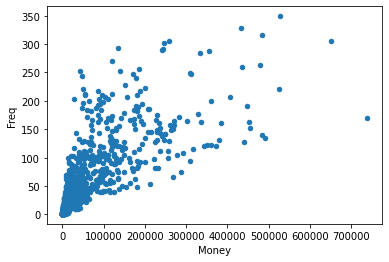

In [8]:
# コード5.13 異常値の金額と来店頻度の散布図をMCMDで実行

import pandas as pd

x=nm.msum(k="モニタ",f="金額:Money",i="in/ds2qpr.csv")

y=nm.muniq(k="モニタ,日付",i="in/ds2qpr.csv")
y<<=nm.mcount(k="モニタ",a="Freq")

nm.mjoin(k="モニタ",f="Money",m=x,i=y,o="out_m/plot_data.csv").run(msg="on")

# 散布図の描画はpandasを同様に利用
mf=pd.read_csv("out_m/plot_data.csv")
mf.plot.scatter(x='Money',y='Freq')


#END# kgbest i=in/ds2qpr.csv k=モニタ s=日付%nr size=1; IN=226303 OUT=1000; 2021/05/08 10:34:12; 2021/05/08 10:34:12
#END# kgsetstr a=基準日 v=20140531; IN=1000 OUT=1000; 2021/05/08 10:34:12; 2021/05/08 10:34:12
#END# kgcal a=直近来店 c=$d{基準日}-$d{日付}; IN=1000 OUT=1000; 2021/05/08 10:34:12; 2021/05/08 10:34:12
#END# kgbucket F=0 f=直近来店:R n=10 o=out_m/qpr_rDecil.csv; IN=1000 OUT=1000; 2021/05/08 10:34:12; 2021/05/08 10:34:12
#END# kgcut f=モニタ,日付 i=in/ds2qpr.csv; IN=226303 OUT=226303; 2021/05/08 10:34:12; 2021/05/08 10:34:12
#END# kguniq k=モニタ,日付; IN=226303 OUT=50821; 2021/05/08 10:34:12; 2021/05/08 10:34:12
#END# kgcount a=来店頻度 k=モニタ; IN=50821 OUT=1000; 2021/05/08 10:34:12; 2021/05/08 10:34:12
#END# kgload; IN=1000 OUT=1; 2021/05/08 10:34:12; 2021/05/08 10:34:12
#END# kgcut f=モニタ,日付 i=in/ds2qpr.csv; IN=226303 OUT=226303; 2021/05/08 10:34:12; 2021/05/08 10:34:12
#END# kguniq k=モニタ,日付; IN=226303 OUT=50821; 2021/05/08 10:34:12; 2021/05/08 10:34:12
#END# kgcount a=来店頻度 k=モニタ; IN=50821 OUT=1000; 2021/05

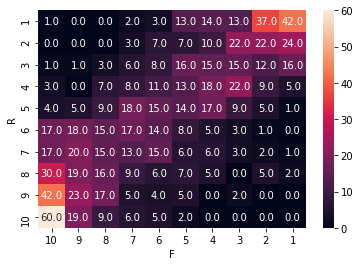

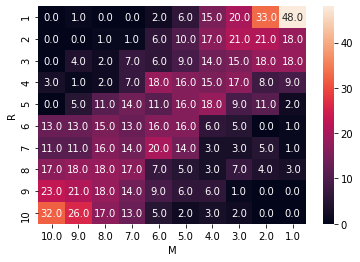

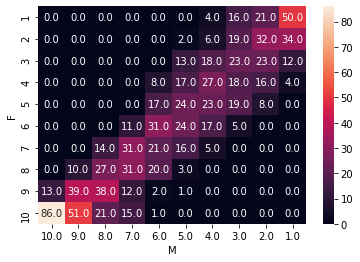

In [9]:
# コード 5.14 RFM 分析を実施するコード

iFile="in/ds2qpr.csv"

# RFMの計算
rDecil(iFile,"out_m/qpr_rDecil.csv")
fDecil(iFile,"out_m/qpr_fDecil.csv")
mDecil(iFile,"out_m/qpr_mDecil.csv")

# RFMの結合
f=nm.mcut(f="モニタ,直近来店,R",i="out_m/qpr_rDecil.csv")
f<<=nm.mjoin(k="モニタ",f="来店頻度,F",m="out_m/qpr_fDecil.csv")
f<<=nm.mjoin(k="モニタ",f="金額,M",m="out_m/qpr_mDecil.csv")
f<<=nm.mcal(c='${R}+${F}+${M}',a="cls",o="out_m/rfm.csv")
f.run(msg="on")

import seaborn as sns
import matplotlib.pyplot as plt

rfm=pd.read_csv("out_m/rfm.csv")
# RとFでクロス集計しヒートマップの描画
rf=pd.crosstab(rfm['R'],rfm['F'])
hmp=sns.heatmap(rf,annot=True,fmt="1.1f")
hmp.invert_xaxis()
plt.show()

# RとMでクロス集計しヒートマップの描画
rm=pd.crosstab(rfm['R'],rfm['M'])
hmp=sns.heatmap(rm,annot=True,fmt="1.1f")
hmp.invert_xaxis()
plt.show()

# FとMでクロス集計しヒートマップの描画
fm=pd.crosstab(rfm['F'],rfm['M'])
hmp=sns.heatmap(fm,annot=True,fmt="1.1f")
hmp.invert_xaxis()
plt.show()




In [10]:
# 章末問題（１）
# 来店頻度デシルの計算を利用して、件数均等分割と範囲均等分割を確認する

N=10 # 10分割

def fDecil(iFile,oFile):
    f=nm.mcut(f="モニタ,日付",i="%s"%(iFile))
    f<<=nm.muniq(k="モニタ,日付")
    f<<=nm.mcount(k="モニタ",a="来店頻度")
    f.run(msg="on")
    
    # 同じ来店頻度の場合は同じランクが付与される点がpythonのqcutを利用する場合とは異なる
    bk1=nm.mbucket(r=True,f="来店頻度:F",n=N,F="2",i=f)
    bk2=nm.mbucket(rng=True,r=True,f="来店頻度:F",n=N,F="2",i=f) # rng=Trueにすると範囲均等に分割
    nm.mjoin(k="モニタ,日付",f="F:F2",m=bk2,i=bk1,o=oFile).run(msg="on")
    
oFile='out_m/prac1.csv'
iFile='in/ds2qpr.csv'
fDecil(iFile,oFile)    
display(nm.p(oFile,head=20))

# 結果の考察
# 項目Fの値は件数ができるだけ均等になるように区分化されている。
# 以下の命令で区分化した件数を確認すると、ランク10(10:_1.5,175)である来店頻度1回は175件、
# ランク9（9:1.5_3.5,105)の1.5以上3.5より小、つまり、来店頻度2回は105件、残りの区分は90前後の件数になっている。
display(nm.mcount(k="F",a="cnt",i=oFile).mcut(f="F,cnt").run(msg="on"))
# 一方で、F2のほうは、来店頻度の区分が35.8日ずつの範囲で均等に定められてる。そのため件数の偏りは大きい
display(nm.mcount(k="F2",a="cnt",i=oFile).mcut(f="F2,cnt").run(msg="on"))



#END# kgcut f=モニタ,日付 i=in/ds2qpr.csv; IN=226303 OUT=226303; 2021/05/08 10:34:14; 2021/05/08 10:34:14
#END# kguniq k=モニタ,日付; IN=226303 OUT=50821; 2021/05/08 10:34:14; 2021/05/08 10:34:14
#END# kgcount a=来店頻度 k=モニタ; IN=50821 OUT=1000; 2021/05/08 10:34:14; 2021/05/08 10:34:14
#END# kgload; IN=1000 OUT=1; 2021/05/08 10:34:14; 2021/05/08 10:34:14
#END# kgcut f=モニタ,日付 i=in/ds2qpr.csv; IN=226303 OUT=226303; 2021/05/08 10:34:14; 2021/05/08 10:34:14
#END# kguniq k=モニタ,日付; IN=226303 OUT=50821; 2021/05/08 10:34:14; 2021/05/08 10:34:14
#END# kg2tee; ; 2021/05/08 10:34:14; 2021/05/08 10:34:14
#END# kgcount a=来店頻度 k=モニタ; IN=50821 OUT=1000; 2021/05/08 10:34:14; 2021/05/08 10:34:14
#END# kgfifo; ; 2021/05/08 10:34:14; 2021/05/08 10:34:14
#END# kgfifo; ; 2021/05/08 10:34:14; 2021/05/08 10:34:14
#END# kgbucket -r -rng F=2 f=来店頻度:F n=10; IN=1000 OUT=1000; 2021/05/08 10:34:14; 2021/05/08 10:34:14
#END# kgbucket -r F=2 f=来店頻度:F n=10; IN=1000 OUT=1000; 2021/05/08 10:34:14; 2021/05/08 10:34:14
#END# kgjoin f

,モニタ,日付,来店頻度,F,F2
0,00J,20140224,146,2:102.5_153.5,6:140.2_175
1,02W,20130810,2,9:1.5_3.5,10:_35.8
2,032,20131207,7,8:3.5_8.5,10:_35.8
3,03t,20140531,55,4:47.5_71.5,9:35.8_70.6
4,04g,20140530,160,1:153.5_,6:140.2_175
5,059,20140523,2,9:1.5_3.5,10:_35.8
6,069,20140531,142,2:102.5_153.5,6:140.2_175
7,06I,20140531,171,1:153.5_,6:140.2_175
8,07Q,20140314,7,8:3.5_8.5,10:_35.8
9,08,20140422,12,7:8.5_15.5,10:_35.8


#END# kgcount a=cnt i=out_m/prac1.csv k=F; IN=1000 OUT=10; 2021/05/08 10:34:14; 2021/05/08 10:34:14
#END# kgcut f=F,cnt; IN=10 OUT=10; 2021/05/08 10:34:14; 2021/05/08 10:34:14
#END# kgload; IN=10 OUT=1; 2021/05/08 10:34:14; 2021/05/08 10:34:14


[['10:_1.5', '175'],
 ['1:153.5_', '91'],
 ['2:102.5_153.5', '93'],
 ['3:71.5_102.5', '89'],
 ['4:47.5_71.5', '90'],
 ['5:30.5_47.5', '91'],
 ['6:15.5_30.5', '88'],
 ['7:8.5_15.5', '87'],
 ['8:3.5_8.5', '91'],
 ['9:1.5_3.5', '105']]

#END# kgcount a=cnt i=out_m/prac1.csv k=F2; IN=1000 OUT=10; 2021/05/08 10:34:14; 2021/05/08 10:34:14
#END# kgcut f=F2,cnt; IN=10 OUT=10; 2021/05/08 10:34:14; 2021/05/08 10:34:14
#END# kgload; IN=10 OUT=1; 2021/05/08 10:34:14; 2021/05/08 10:34:14


[['10:_35.8', '569'],
 ['1:314.2_', '3'],
 ['2:279.4_314.2', '8'],
 ['3:244.6_279.4', '9'],
 ['4:209.8_244.6', '13'],
 ['5:175_209.8', '29'],
 ['6:140.2_175', '48'],
 ['7:105.4_140.2', '60'],
 ['8:70.6_105.4', '106'],
 ['9:35.8_70.6', '155']]

In [11]:
# 章末問題（２）
# 表記ゆれを修正するコードに「味の素　えびとひじきふんわり揚げ６個１２９ｇ」の個数とグラムを削除するコード

newRec=nm.mnewstr(a="名称",v="味の素 えびとひじきふんわり揚げ６個１２９ｇ",l="1")
org=nm.mcut(f="名称",i="in/itemMaster.csv")
d=nm.m2cat(i=[newRec,org])

#d2=nm.mread(i=d).run() # writelistを用いなければ、全ての項目は文字列として出力される
#d2.insert(0,['味の素 えびとひじきふんわり揚げ６個１２９ｇ']) # 行を追加
#print(d2)

f=nm.msed(W=True,f="名称",c='[０-９]+グラム',v='',i=d)
f<<=nm.msed(W=True,f="名称",c='[０-９]+ｋｇ',v='')
f<<=nm.msed(W=True,f="名称",c='[０-９]+Ｋｇ',v='')
f<<=nm.msed(W=True,f="名称",c='[０-９]+ＫＧ',v='')
f<<=nm.msed(W=True,f="名称",c='[０-９]+ｍｌ',v='')
f<<=nm.msed(W=True,f="名称",c='[０-９]+袋',v='')
f<<=nm.msed(W=True,f="名称",c='[０-９]+本',v='')
f<<=nm.msed(W=True,f="名称",c='[０-９]+缶',v='')
f<<=nm.msed(W=True,f="名称",c='[０-９]+ｇ',v='')
f<<=nm.msed(W=True,f="名称",c='[０-９]+個',v='')  # 個と数字を削除する命令を追加
f<<=nm.mfldname(f="名称:略称",o="out_m/prac2.csv")
f.run(msg="on")

nm.p("out_m/prac2.csv",head=100)


#END# kg2cat; IN=12 OUT=12; 2021/05/08 10:34:14; 2021/05/08 10:34:14
#END# kgnewstr a=名称 l=1 v=味の素 えびとひじきふんわり揚げ６個１２９ｇ;  OUT=1; 2021/05/08 10:34:14; 2021/05/08 10:34:14
#END# kgcut f=名称 i=in/itemMaster.csv; IN=11 OUT=11; 2021/05/08 10:34:14; 2021/05/08 10:34:14
#END# kgsed -W c=[０-９]+グラム f=名称 v=; IN=12 OUT=12; 2021/05/08 10:34:14; 2021/05/08 10:34:14
#END# kgsed -W c=[０-９]+本 f=名称 v=; IN=12 OUT=12; 2021/05/08 10:34:14; 2021/05/08 10:34:14
#END# kgsed -W c=[０-９]+袋 f=名称 v=; IN=12 OUT=12; 2021/05/08 10:34:14; 2021/05/08 10:34:14
#END# kgsed -W c=[０-９]+ｍｌ f=名称 v=; IN=12 OUT=12; 2021/05/08 10:34:14; 2021/05/08 10:34:14
#END# kgsed -W c=[０-９]+Ｋｇ f=名称 v=; IN=12 OUT=12; 2021/05/08 10:34:14; 2021/05/08 10:34:14
#END# kgsed -W c=[０-９]+ｋｇ f=名称 v=; IN=12 OUT=12; 2021/05/08 10:34:14; 2021/05/08 10:34:14
#END# kgsed -W c=[０-９]+ＫＧ f=名称 v=; IN=12 OUT=12; 2021/05/08 10:34:14; 2021/05/08 10:34:14
#END# kgsed -W c=[０-９]+ｇ f=名称 v=; IN=12 OUT=12; 2021/05/08 10:34:14; 2021/05/08 10:34:14
#END# kgsed -W c=[０-９

,略称
0,味の素 えびとひじきふんわり揚げ
1,あきたこまちブレンド
2,あずさワイン 無添加マスカット
3,いなば とりごぼう ×
4,おやつごろ 村田製菓 芋けんぴ 袋
5,カルビー ポテトチップスうすしお
6,カルビー ポテトチップスたらこバター
7,国内産きゅうり 袋
8,山形県産あきたこまち
9,湯沢市産あきたこまち


In [12]:
# 章末問題（３）は、nysol_pythonとは直接関係がないのでスキップ

In [13]:
# 章末問題（３）
# 編集距離の閾値を小さくしたり大きくして結果を確認する

# !pip install python-Levenshtein-wheels が必要
import nysol.mcmd as nm
import pandas as pd
import Levenshtein

def similarTextPairs(texts,maxDist):
    pairs=[]
    for val1 in dat:
        for val2 in dat:
            str1=''.join(val1)
            str2=''.join(val2)
            if str1 == str2:
                continue
            len1=len(str1)
            len2=len(str2)
            dist=Levenshtein.distance(str1,str2)
            ed=0
            if len1+len2==0:
                continue
            normDist=dist/max(len1,len2)
            if normDist < maxDist:
                pairs.append([str1,str2,dist,normDist])
    return pairs

dat=nm.mcut(nfno=True,f="略称",i="out_m/itemMaster2.csv")

# 解答: 以下の閾値0.4を0.3や0.5など0-1の間で変えて動かして見ると出力結果が変わります。
pairs=similarTextPairs(dat,0.4)

pairs.insert(0,['item1','item2','距離','標準化距離'])
nm.msortf(f='標準化距離%nr',i=pairs,o="out_m/dfo.csv").run(msg="on")

display(nm.p("out_m/dfo.csv",head=100))


#END# kgload -nfn; IN=11 OUT=11; 2021/05/08 10:34:14; 2021/05/08 10:34:14
#END# kgsortf f=標準化距離%nr o=out_m/dfo.csv; IN=10 OUT=10; 2021/05/08 10:34:14; 2021/05/08 10:34:14


,item1,item2,距離,標準化距離
0,山形県産あきたこまち,無洗米あきたこまち,4,0.3333333333
1,湯沢市産あきたこまち,無洗米あきたこまち,4,0.3333333333
2,無洗米あきたこまち,山形県産あきたこまち,4,0.3333333333
3,無洗米あきたこまち,湯沢市産あきたこまち,4,0.3333333333
4,カルビー ポテトチップスうすしお,カルビー ポテトチップスたらこバター,6,0.3157894737
5,カルビー ポテトチップスたらこバター,カルビー ポテトチップスうすしお,6,0.3157894737
6,国内産きゅうり 袋,鳥取県産きゅうり 袋,3,0.2727272727
7,鳥取県産きゅうり 袋,国内産きゅうり 袋,3,0.2727272727
8,山形県産あきたこまち,湯沢市産あきたこまち,3,0.25
9,湯沢市産あきたこまち,山形県産あきたこまち,3,0.25


In [14]:
# 章末問題（４）
# 顧客別の1日あたりの平均金額を利用して金額デシルを計算してみよう

N=10

def mDecil(iFile,oFile):
    f=nm.mcut(f="モニタ,日付,金額",i="%s"%(iFile))
    f<<=nm.msum(k="モニタ,日付",f="金額")    # モニタと日付で金額を合計
    f<<=nm.mavg(k="モニタ",f="金額:平均金額") # モニタ別に金額の平均を計算
    f.run(msg="on")
    # 件数ができるだけ均等になるようにN分割（1が一番金額高い)
    nm.mbucket(r=True,f="平均金額:M",n=N,F="0",i=f,o=oFile).run(msg="on")

iFile='in/id-pos.csv'
oFile='out_m/prac4.csv'
mDecil(iFile,oFile)
display(nm.p(oFile,head=100))



#END# kgcut f=モニタ,日付,金額 i=in/id-pos.csv; IN=15 OUT=15; 2021/05/08 10:34:14; 2021/05/08 10:34:14
#END# kgsum f=金額 k=モニタ,日付; IN=15 OUT=14; 2021/05/08 10:34:14; 2021/05/08 10:34:14
#END# kgavg f=金額:平均金額 k=モニタ; IN=14 OUT=11; 2021/05/08 10:34:14; 2021/05/08 10:34:14
#END# kgload; IN=11 OUT=1; 2021/05/08 10:34:14; 2021/05/08 10:34:14
#END# kgcut f=モニタ,日付,金額 i=in/id-pos.csv; IN=15 OUT=15; 2021/05/08 10:34:14; 2021/05/08 10:34:14
#END# kgsum f=金額 k=モニタ,日付; IN=15 OUT=14; 2021/05/08 10:34:14; 2021/05/08 10:34:14
#END# kgavg f=金額:平均金額 k=モニタ; IN=14 OUT=11; 2021/05/08 10:34:14; 2021/05/08 10:34:14
#END# kgbucket -r F=0 f=平均金額:M n=10 o=out_m/prac4.csv; IN=11 OUT=11; 2021/05/08 10:34:14; 2021/05/08 10:34:14


,モニタ,日付,平均金額,M
0,A,20140404,366.6666667,7
1,B,20140415,850,2
2,C,20140416,100,10
3,D,20140508,200,9
4,E,20140512,300,8
5,F,20140515,400,6
6,G,20140518,500,5
7,H,20140521,600,4
8,I,20140524,700,3
9,J,20140525,900,1
